<a href="https://colab.research.google.com/github/WanderingVector/USCensus2020/blob/main/2020_Census_BigQuery_Client_get_job.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Setup
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

project = 'sabrenaproject' # Project ID inserted based on the query results selected to explore
location = 'US' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np


## Reference SQL syntax from the original job
Use the ```jobs.query```
[method](https://cloud.google.com/bigquery/docs/reference/rest/v2/jobs/query) to
return the SQL syntax from the job. This can be copied from the output cell
below to edit the query now or in the future. Alternatively, you can use
[this link](https://console.cloud.google.com/bigquery?j=sabrenaproject:US:bquxjob_4c1569e9_18bbbfdaedb)
back to BigQuery to edit the query within the BigQuery user interface.

In [ ]:
# Running this code will display the query used to generate your previous job

job = client.get_job('bquxjob_4c1569e9_18bbbfdaedb') # Job ID inserted based on the query results selected to explore
print(job.query)

SELECT* FROM `bigquery-public-data.census_bureau_acs.cbsa_2020_5yr` 
LIMIT 1000


# Result set loaded from BigQuery job as a DataFrame
Query results are referenced from the Job ID ran from BigQuery and the query
does not need to be re-run to explore results. The ```to_dataframe```
[method](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.job.QueryJob.html#google.cloud.bigquery.job.QueryJob.to_dataframe)
downloads the results to a Pandas DataFrame by using the BigQuery Storage API.

To edit query syntax, you can do so from the BigQuery SQL editor or in the
```Optional:``` sections below.

Data Description

In [ ]:
# Running this code will read results from your previous job

job = client.get_job('bquxjob_4c1569e9_18bbbfdaedb') # Job ID inserted based on the query results selected to explore
results = job.to_dataframe()
results

,geo_id,aggregate_travel_time_to_work,amerindian_including_hispanic,amerindian_pop,armed_forces,asian_including_hispanic,asian_male_45_54,asian_male_55_64,asian_pop,associates_degree,...,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,walked_to_work,white_including_hispanic,white_male_45_54,white_male_55_64,white_pop,worked_at_home,workers_16_and_over
0,10740,9333495.0,52677.0,46796.0,3703.0,21507.0,1369.0,844.0,19876.0,56325.0,...,34556.0,9247.0,3658.0,6786.0,647918.0,22712.0,29725.0,351125.0,28293.0,416188.0
1,11260,4047440.0,28415.0,26420.0,9618.0,30246.0,1661.0,1311.0,29037.0,24163.0,...,21377.0,4116.0,1741.0,4808.0,266588.0,17745.0,19250.0,249910.0,11608.0,194009.0
2,14020,1592795.0,467.0,399.0,104.0,9751.0,289.0,210.0,9736.0,7861.0,...,7078.0,1553.0,525.0,4934.0,146129.0,7513.0,8337.0,142727.0,5953.0,80927.0
3,14500,3397390.0,1656.0,1136.0,164.0,15832.0,892.0,602.0,15686.0,13861.0,...,8044.0,2094.0,592.0,7925.0,283102.0,16775.0,17290.0,250714.0,27740.0,172227.0
4,15500,1806220.0,688.0,425.0,172.0,2679.0,234.0,186.0,2613.0,12234.0,...,6263.0,1245.0,350.0,760.0,114429.0,7151.0,7451.0,104817.0,3406.0,76584.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,32340,160920.0,47.0,46.0,7.0,324.0,11.0,61.0,324.0,880.0,...,1270.0,180.0,112.0,466.0,20724.0,987.0,1144.0,20452.0,540.0,10869.0
935,16260,359840.0,996.0,972.0,27.0,502.0,0.0,83.0,463.0,3206.0,...,4361.0,740.0,96.0,628.0,48229.0,2048.0,2239.0,45396.0,1858.0,23152.0
936,29020,654400.0,443.0,302.0,27.0,1113.0,54.0,83.0,1113.0,5174.0,...,5030.0,979.0,796.0,497.0,71398.0,4425.0,4876.0,69694.0,1758.0,36520.0
937,16660,503560.0,75.0,54.0,0.0,620.0,17.0,83.0,553.0,4689.0,...,3159.0,739.0,341.0,1472.0,57661.0,3279.0,3859.0,56740.0,1889.0,29934.0


from matplotlib import pyplot as plt
results['aggregate_travel_time_to_work'].plot(kind='hist', bins=20, title='aggregate_travel_time_to_work')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results['amerindian_including_hispanic'].plot(kind='hist', bins=20, title='amerindian_including_hispanic')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results['amerindian_pop'].plot(kind='hist', bins=20, title='amerindian_pop')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results['armed_forces'].plot(kind='hist', bins=20, title='armed_forces')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results.plot(kind='scatter', x='aggregate_travel_time_to_work', y='amerindian_including_hispanic', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results.plot(kind='scatter', x='amerindian_including_hispanic', y='amerindian_pop', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results.plot(kind='scatter', x='amerindian_pop', y='armed_forces', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results.plot(kind='scatter', x='armed_forces', y='asian_including_hispanic', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results['aggregate_travel_time_to_work'].plot(kind='line', figsize=(8, 4), title='aggregate_travel_time_to_work')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
results['amerindian_including_hispanic'].plot(kind='line', figsize=(8, 4), title='amerindian_including_hispanic')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
results['amerindian_pop'].plot(kind='line', figsize=(8, 4), title='amerindian_pop')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
results['armed_forces'].plot(kind='line', figsize=(8, 4), title='armed_forces')
plt.gca().spines[['top', 'right']].set_visible(False)

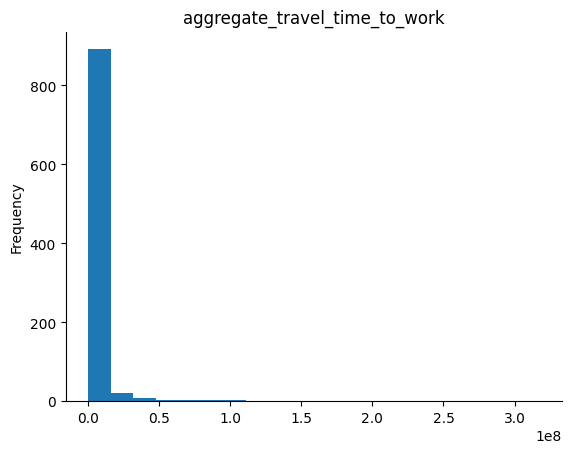

In [ ]:
from matplotlib import pyplot as plt
results['aggregate_travel_time_to_work'].plot(kind='hist', bins=20, title='aggregate_travel_time_to_work')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# @title Default title text
# prompt: Using dataframe results: print(client.get_job.isnull().sum())

print(results.isnull().sum())


geo_id                           0
aggregate_travel_time_to_work    5
amerindian_including_hispanic    0
amerindian_pop                   0
armed_forces                     0
                                ..
white_male_45_54                 0
white_male_55_64                 0
white_pop                        0
worked_at_home                   0
workers_16_and_over              0
Length: 245, dtype: int64


In [ ]:
df='client.get_job'

## Show descriptive statistics using describe()
Use the ```pandas DataFrame.describe()```
[method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
to generate descriptive statistics. Descriptive statistics include those that
summarize the central tendency, dispersion and shape of a dataset’s
distribution, excluding ```NaN``` values. You may also use other Python methods
to interact with your data.

In [ ]:
results.describe()

,aggregate_travel_time_to_work,amerindian_including_hispanic,amerindian_pop,armed_forces,asian_including_hispanic,asian_male_45_54,asian_male_55_64,asian_pop,associates_degree,bachelors_degree,...,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,walked_to_work,white_including_hispanic,white_male_45_54,white_male_55_64,white_pop,worked_at_home,workers_16_and_over
count,9.340000e+02,939.000000,939.000000,939.000000,9.390000e+02,939.000000,939.000000,9.390000e+02,939.000000,9.390000e+02,...,939.000000,939.000000,939.000000,939.000000,9.390000e+02,939.000000,939.000000,9.390000e+02,939.000000,9.390000e+02
mean,3.955052e+06,2349.651757,1720.397231,1204.313099,1.950737e+04,1252.877529,987.521832,1.925334e+04,19506.948882,4.678081e+04,...,14902.613419,2761.410011,1121.760383,3997.982961,2.307440e+05,12766.568690,14070.853035,1.936435e+05,11457.849840,1.567585e+05
std,1.597738e+07,7906.275370,6020.656963,5306.048619,1.242094e+05,8246.298376,7055.818044,1.228586e+05,56827.645499,1.774476e+05,...,38283.958940,8543.339123,3169.290959,20464.506846,6.560528e+05,35897.307831,38638.429276,5.219898e+05,43589.516025,5.323964e+05
min,7.066000e+04,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,337.000000,5.280000e+02,...,500.000000,4.000000,0.000000,0.000000,4.711000e+03,0.000000,0.000000,1.900000e+01,44.000000,3.269000e+03
25%,3.558775e+05,125.000000,91.500000,11.000000,2.790000e+02,7.000000,3.000000,2.755000e+02,2493.000000,3.528000e+03,...,2620.500000,283.500000,164.500000,347.000000,3.307200e+04,1823.000000,2092.500000,2.976100e+04,737.500000,1.755100e+04
50%,6.888900e+05,381.000000,297.000000,49.000000,7.710000e+02,48.000000,33.000000,7.500000e+02,4993.000000,7.447000e+03,...,5201.000000,629.000000,336.000000,806.000000,6.055400e+04,3420.000000,4046.000000,5.528600e+04,1619.000000,3.168400e+04
75%,1.819356e+06,1392.000000,1033.000000,281.500000,3.590500e+03,206.000000,158.000000,3.537000e+03,12420.000000,2.226300e+04,...,11220.000000,1674.000000,759.000000,2163.000000,1.473825e+05,8294.500000,9532.500000,1.364465e+05,4994.000000,8.532950e+04
max,3.172920e+08,106287.000000,86770.000000,85427.000000,2.206530e+06,147407.000000,130118.000000,2.186532e+06,914440.000000,3.221073e+06,...,690776.000000,126756.000000,53087.000000,523412.000000,1.072606e+07,588331.000000,642502.000000,8.749418e+06,681938.000000,9.256554e+06


from matplotlib import pyplot as plt
_df_0['aggregate_travel_time_to_work'].plot(kind='hist', bins=20, title='aggregate_travel_time_to_work')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['amerindian_including_hispanic'].plot(kind='hist', bins=20, title='amerindian_including_hispanic')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['amerindian_pop'].plot(kind='hist', bins=20, title='amerindian_pop')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['armed_forces'].plot(kind='hist', bins=20, title='armed_forces')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='aggregate_travel_time_to_work', y='amerindian_including_hispanic', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='amerindian_including_hispanic', y='amerindian_pop', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='amerindian_pop', y='armed_forces', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='armed_forces', y='asian_including_hispanic', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['aggregate_travel_time_to_work'].plot(kind='line', figsize=(8, 4), title='aggregate_travel_time_to_work')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['amerindian_including_hispanic'].plot(kind='line', figsize=(8, 4), title='amerindian_including_hispanic')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['amerindian_pop'].plot(kind='line', figsize=(8, 4), title='amerindian_pop')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['armed_forces'].plot(kind='line', figsize=(8, 4), title='armed_forces')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='aggregate_travel_time_to_work', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='amerindian_including_hispanic', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='amerindian_pop', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='armed_forces', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

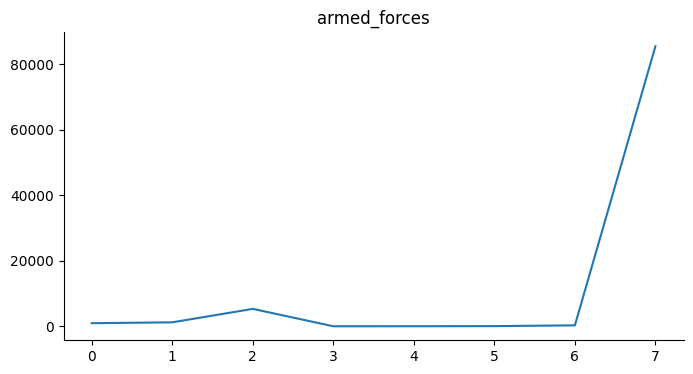

In [ ]:
from matplotlib import pyplot as plt
_df_12['armed_forces'].plot(kind='line', figsize=(8, 4), title='armed_forces')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
print(len('bquxjob_4c1569e9_18bbbfdaedb') == 0)

False
